### Import required modules

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import pickle
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

### Read training and testing data from local files

In [2]:
train_data_df = pd.read_csv('dataset/Train.csv')
test_data_df = pd.read_csv('dataset/Test.csv')

In [3]:
train_data_df.head(10)

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376
5,15007,VENDOR-2076,GL-6101400,32.28,Final Site Clean Up 2018Mar Store Construction...,CLASS-1522
6,15009,VENDOR-1802,GL-6050310,5.38,Travel and Entertainment Miscellaneous Company...,CLASS-1758
7,15010,VENDOR-1191,GL-6101400,31.21,General Contractor General Requirements Final ...,CLASS-1522
8,15011,VENDOR-2120,GL-6100410,42.89,Aquila Distributors Inc ...,CLASS-1963
9,15012,VENDOR-1704,GL-6050100,59.50,Base Rent Store Management Chicago Rivet & Mac...,CLASS-1274


In [4]:
test_data_df.head(10)

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description
0,15003,VENDOR-2513,GL-6050310,56.13,Travel and Entertainment Miscellaneous Company...
1,15008,VENDOR-1044,GL-6101400,96.56,Final Site Clean Up Store Construction Advance...
2,15013,VENDOR-1254,GL-6101400,55.93,Arabian American Development Co Final Site Cle...
3,15019,VENDOR-1331,GL-2182000,32.62,Corporate Services Contingent Labor/Temp Labor...
4,15020,VENDOR-2513,GL-6050310,25.81,Fortune National Corp Miscellaneous Company Ca...
5,15022,VENDOR-2513,GL-6050310,22.71,Dec2007 Fortune National Corp Miscellaneous Co...
6,15024,VENDOR-1883,GL-2182000,47.38,Auto Leasing Corporate Services Corning Inc /N...
7,15026,VENDOR-2543,GL-6020600,26.08,Taxes Taxes Mar 2014 Frischs Restaurants Inc N...
8,15027,VENDOR-1944,GL-2182000,42.76,Daly John J Auto Fleet Repair and Maintenance ...
9,15028,VENDOR-2032,GL-6100500,70.47,SMAP Media Buy - Traditional Cgg Holding (U.S....


### Analyze columns data

In [5]:
print(len(train_data_df.Vendor_Code.unique()))
print(train_data_df.Vendor_Code.unique())

1253
['VENDOR-1676' 'VENDOR-1883' 'VENDOR-1999' ... 'VENDOR-1309' 'VENDOR-1969'
 'VENDOR-1691']


In [7]:
print(len(train_data_df.GL_Code.unique()))
print(train_data_df.GL_Code.unique())

9
['GL-6100410' 'GL-2182000' 'GL-6050100' 'GL-6101400' 'GL-6050310'
 'GL-6060100' 'GL-6100500' 'GL-6121905' 'GL-6020600']


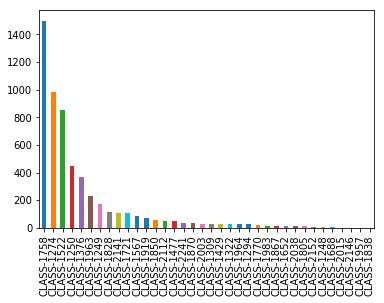

In [8]:
train_data_df['Product_Category'].value_counts().plot(kind='bar')

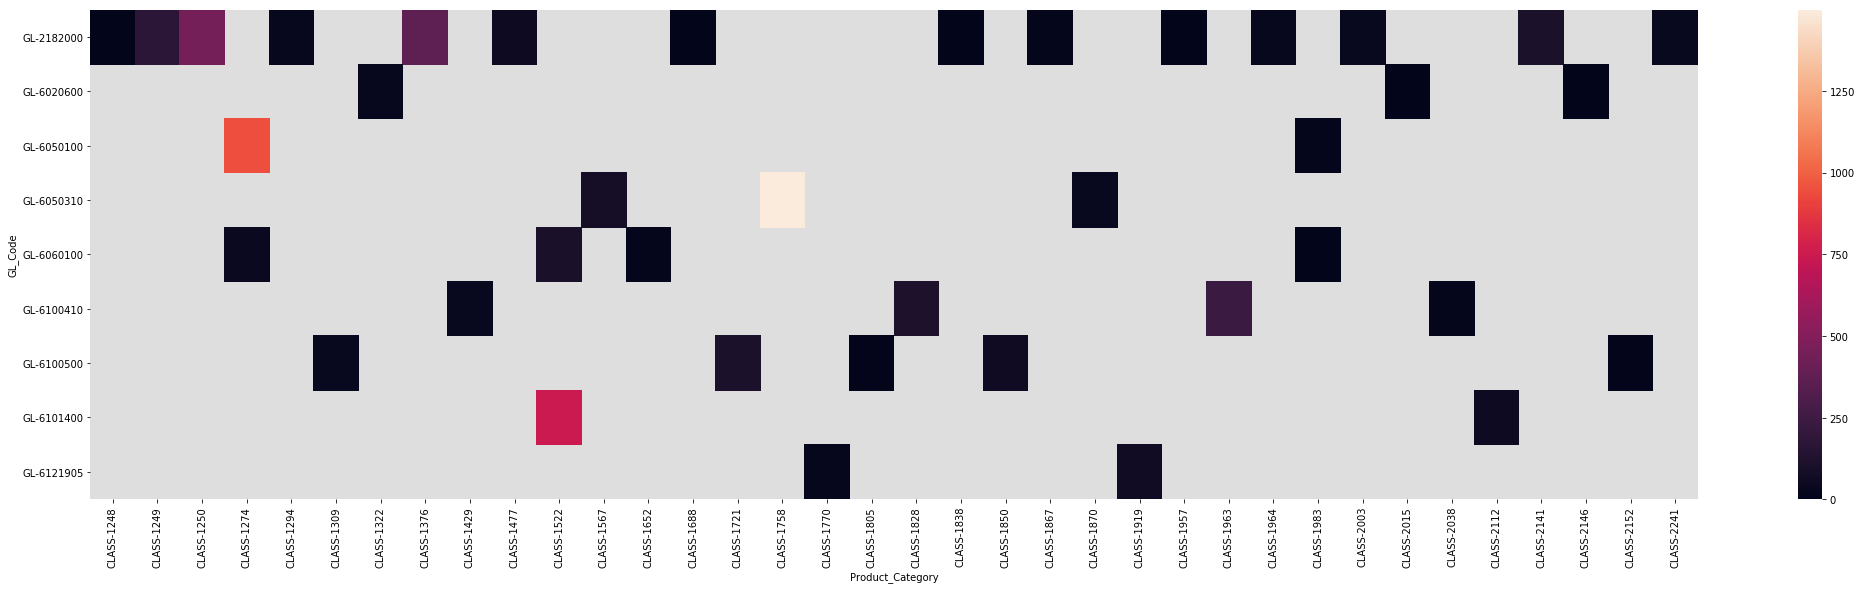

In [13]:
new_df = train_data_df.groupby(['GL_Code','Product_Category']).size().reset_index().rename(columns={0:'Size'})
pv = new_df.pivot("GL_Code", "Product_Category", "Size")
f, ax = plt.subplots(figsize=(36, 9))
sns.heatmap(pv, ax=ax).set_facecolor('#dedede')
plt.show()

### Apply OneHotEncoding on Categorical Data (GL_Code column) for both train & test data

In [14]:
le = LabelEncoder() 
train_data_df.iloc[:,2]= le.fit_transform(train_data_df.iloc[:,2])
test_data_df.iloc[:,2]= le.transform(test_data_df.iloc[:,2])

In [15]:
ohe = OneHotEncoder(sparse=False) 
train_ohe = ohe.fit_transform(train_data_df.iloc[:,2].values.reshape(-1,1))
test_ohe = ohe.transform(test_data_df.iloc[:,2].values.reshape(-1,1))

C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [16]:
train_ohe_df = pd.DataFrame(train_ohe, columns=['GL_Code_' + str(i) for i in range(len(train_data_df['GL_Code'].unique()))])
test_ohe_df = pd.DataFrame(test_ohe, columns=['GL_Code_' + str(i) for i in range(len(train_data_df['GL_Code'].unique()))])

In [17]:
train_data_df = pd.concat([train_data_df, train_ohe_df], axis=1)
test_data_df = pd.concat([test_data_df, test_ohe_df], axis=1)

In [20]:
train_data_df.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,GL_Code_0,GL_Code_1,GL_Code_2,GL_Code_3,GL_Code_4,GL_Code_5,GL_Code_6,GL_Code_7,GL_Code_8
0,15001,VENDOR-1676,5,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,15002,VENDOR-1883,0,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15004,VENDOR-1999,2,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15005,VENDOR-1771,7,48.50,Store Construction General Requirements Coloni...,CLASS-1522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,15006,VENDOR-1331,0,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
test_data_df.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,GL_Code_0,GL_Code_1,GL_Code_2,GL_Code_3,GL_Code_4,GL_Code_5,GL_Code_6,GL_Code_7,GL_Code_8
0,15003,VENDOR-2513,3,56.13,Travel and Entertainment Miscellaneous Company...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,15008,VENDOR-1044,7,96.56,Final Site Clean Up Store Construction Advance...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,15013,VENDOR-1254,7,55.93,Arabian American Development Co Final Site Cle...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,15019,VENDOR-1331,0,32.62,Corporate Services Contingent Labor/Temp Labor...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15020,VENDOR-2513,3,25.81,Fortune National Corp Miscellaneous Company Ca...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Define function to clean data i.e to remove punctuations and stopwords

In [22]:
def clean_description(description):
    words_array = re.sub("[^a-zA-Z]", " ", description).lower().split()
    words_array = [word for word in words_array if word not in set(stopwords.words('english'))]
    return ' '.join(words_array)

### Apply funtion defined above on 'Item Description' column as it will be used to train classifier

In [23]:
train_data_df['Item_Description'] = train_data_df['Item_Description'].apply(clean_description)
test_data_df['Item_Description'] = test_data_df['Item_Description'].apply(clean_description)

In [24]:
train_data_df.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,GL_Code_0,GL_Code_1,GL_Code_2,GL_Code_3,GL_Code_4,GL_Code_5,GL_Code_6,GL_Code_7,GL_Code_8
0,15001,VENDOR-1676,5,83.24,artworking typesetting production jun champion...,CLASS-1963,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,15002,VENDOR-1883,0,51.18,auto leasing corporate services corning inc ny...,CLASS-1250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15004,VENDOR-1999,2,79.02,store management lease rent deltona corp real ...,CLASS-1274,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15005,VENDOR-1771,7,48.50,store construction general requirements coloni...,CLASS-1522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,15006,VENDOR-1331,0,63.35,jul aydin corp contingent labor temp labor con...,CLASS-1376,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
test_data_df.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,GL_Code_0,GL_Code_1,GL_Code_2,GL_Code_3,GL_Code_4,GL_Code_5,GL_Code_6,GL_Code_7,GL_Code_8
0,15003,VENDOR-2513,3,56.13,travel entertainment miscellaneous company car...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,15008,VENDOR-1044,7,96.56,final site clean store construction advanced m...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,15013,VENDOR-1254,7,55.93,arabian american development co final site cle...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,15019,VENDOR-1331,0,32.62,corporate services contingent labor temp labor...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15020,VENDOR-2513,3,25.81,fortune national corp miscellaneous company ca...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Next few code blocks are used to analyze the frequency of words in 'Item Description' column
### It will be help us to decide number of features from 'Item_Description' column to train our classifier

In [26]:
tokens = [description.split() for description in train_data_df['Item_Description']] 
words = [word for token in tokens for word in token]

words_set = [word for word in words]

In [27]:
freq = nltk.FreqDist(words_set)
i= 1
for key, value in freq.most_common(200):
    print(str(i) + ". " + key + " - " + str(value))
    i = i + 1

1. miscellaneous - 3036
2. company - 3013
3. car - 2996
4. field - 2996
5. inc - 2132
6. services - 2011
7. rent - 1975
8. store - 1872
9. general - 1753
10. corporate - 1728
11. transportation - 1619
12. entertainment - 1499
13. travel - 1498
14. ground - 1498
15. corp - 1468
16. labor - 1460
17. auto - 1257
18. co - 1102
19. leasing - 1078
20. real - 1055
21. estate - 1055
22. management - 1023
23. lease - 987
24. base - 987
25. construction - 904
26. smap - 899
27. requirements - 851
28. contractor - 851
29. final - 851
30. site - 851
31. clean - 851
32. maintenance - 803
33. contingent - 730
34. temp - 730
35. production - 633
36. nov - 499
37. resources - 492
38. dec - 481
39. aug - 481
40. mar - 465
41. jul - 458
42. oct - 458
43. feb - 456
44. jun - 455
45. apr - 455
46. jan - 453
47. sep - 453
48. may - 452
49. national - 430
50. media - 405
51. human - 401
52. industries - 380
53. ny - 355
54. corning - 339
55. buy - 335
56. ltd - 318
57. agency - 308
58. bd - 306
59. trust - 

### Apply CountVectorizer on 'Item_Description' column

In [28]:
cv = CountVectorizer(max_features = 75) 
train_cv = cv.fit_transform(train_data_df['Item_Description']).toarray() 
test_cv = cv.transform(test_data_df['Item_Description']).toarray()

In [29]:
train_cv_df = pd.DataFrame(train_cv, columns=['Item_Description_' + str(i) for i in range(75)])
test_cv_df = pd.DataFrame(test_cv, columns=['Item_Description_' + str(i) for i in range(75)])

In [31]:
train_data_df = pd.concat([train_data_df, train_cv_df], axis=1)
test_data_df = pd.concat([test_data_df, test_cv_df], axis=1)

In [32]:
train_data_df.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,GL_Code_0,GL_Code_1,GL_Code_2,GL_Code_3,...,Item_Description_65,Item_Description_66,Item_Description_67,Item_Description_68,Item_Description_69,Item_Description_70,Item_Description_71,Item_Description_72,Item_Description_73,Item_Description_74
0,15001,VENDOR-1676,5,83.24,artworking typesetting production jun champion...,CLASS-1963,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,15002,VENDOR-1883,0,51.18,auto leasing corporate services corning inc ny...,CLASS-1250,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,15004,VENDOR-1999,2,79.02,store management lease rent deltona corp real ...,CLASS-1274,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,15005,VENDOR-1771,7,48.50,store construction general requirements coloni...,CLASS-1522,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,1,0
4,15006,VENDOR-1331,0,63.35,jul aydin corp contingent labor temp labor con...,CLASS-1376,1.0,0.0,0.0,0.0,...,0,0,0,2,0,0,0,0,0,0


In [33]:
test_data_df.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,GL_Code_0,GL_Code_1,GL_Code_2,GL_Code_3,GL_Code_4,...,Item_Description_65,Item_Description_66,Item_Description_67,Item_Description_68,Item_Description_69,Item_Description_70,Item_Description_71,Item_Description_72,Item_Description_73,Item_Description_74
0,15003,VENDOR-2513,3,56.13,travel entertainment miscellaneous company car...,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,1,0,0
1,15008,VENDOR-1044,7,96.56,final site clean store construction advanced m...,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
2,15013,VENDOR-1254,7,55.93,arabian american development co final site cle...,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
3,15019,VENDOR-1331,0,32.62,corporate services contingent labor temp labor...,1.0,0.0,0.0,0.0,0.0,...,0,0,0,2,0,0,0,0,0,0
4,15020,VENDOR-2513,3,25.81,fortune national corp miscellaneous company ca...,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,1,0,0


### Save the required data as training and testing respectively as pickle files

In [34]:
train_data_df.to_csv('processed_data/train_data.csv')

In [35]:
test_data_df.to_csv('processed_data/test_data.csv')